<a href="https://colab.research.google.com/github/MuzniZakiRiyadi/Text_Analysis/blob/main/UAS_TEXT_ANALYSIS_MUZNI_ZAKI_RIYADI_2008108010027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project UAS Text Analysis
- Nama : Muzni Zaki Riyadi
- NIM  : 2008108010027

## Data
Data yang akan digunakan adalah komentar atau review dari pengguna aplikasi JNT_Cargo

In [1]:
!pip install google_play_scraper

In [2]:
from google_play_scraper import Sort, reviews_all
import pandas as pd

In [3]:
result = reviews_all(
        'com.jt.indonesiaexpress',
        sleep_milliseconds=0,
        lang='id',
        country='id',
        sort=Sort.NEWEST
    )

JNT_Cargo = pd.DataFrame.from_records(result)
JNT_Cargo = JNT_Cargo[['at','userName' ,'content', 'score' ]]

In [4]:
JNT_Cargo

,at,userName,content,score
0,2023-12-22 13:18:22,Ghefira Nurfatimah,Pengiriman lama. Layanan dri mulai pick up sam...,1
1,2023-12-22 11:50:57,Ahmad Syaifullah,"Motor gw mana bangsaaat ,udah sebulan lebih ga...",1
2,2023-12-22 08:33:56,Dael Harriss,"Paket saya gagal terus gak di kirim² , para ku...",1
3,2023-12-21 16:18:14,Sepransiska W.,EKSPEDISI TUKANG MALING! KIRIM KOPER BGR-JKT M...,1
4,2023-12-20 21:57:08,Tri Raharjo,Apaan nih barang utk dikirim tdk bergerak tert...,1
...,...,...,...,...
1117,2022-02-24 08:10:06,Rendy Apriyanto,Solo ga bisa cek ongkir,1
1118,2022-02-24 03:21:06,SANDY KOI,Baru download dan baru nyoba mudah2an bagus,3
1119,2022-02-22 23:02:08,Tika Fathur,"Ngaco, gak bisa kirim ke makassar",4
1120,2022-02-22 17:13:45,Mirzan Saputra,DP nya belum lengkap,5


In [5]:
JNT_Cargo['at'] = pd.to_datetime(JNT_Cargo['at'])

# Filter data diambil dari tanggal 01-01-2023
data_review_JNT_Cargo= JNT_Cargo

In [6]:
data_review_JNT_Cargo

,at,userName,content,score
0,2023-12-22 13:18:22,Ghefira Nurfatimah,Pengiriman lama. Layanan dri mulai pick up sam...,1
1,2023-12-22 11:50:57,Ahmad Syaifullah,"Motor gw mana bangsaaat ,udah sebulan lebih ga...",1
2,2023-12-22 08:33:56,Dael Harriss,"Paket saya gagal terus gak di kirim² , para ku...",1
3,2023-12-21 16:18:14,Sepransiska W.,EKSPEDISI TUKANG MALING! KIRIM KOPER BGR-JKT M...,1
4,2023-12-20 21:57:08,Tri Raharjo,Apaan nih barang utk dikirim tdk bergerak tert...,1
...,...,...,...,...
1117,2022-02-24 08:10:06,Rendy Apriyanto,Solo ga bisa cek ongkir,1
1118,2022-02-24 03:21:06,SANDY KOI,Baru download dan baru nyoba mudah2an bagus,3
1119,2022-02-22 23:02:08,Tika Fathur,"Ngaco, gak bisa kirim ke makassar",4
1120,2022-02-22 17:13:45,Mirzan Saputra,DP nya belum lengkap,5


In [7]:
!pip install nltk
!pip install sastrawi


In [8]:
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


import re
import nltk

nltk.download('punkt')

from tqdm import tqdm
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

def stemmerSastrawi(text):
    return stemmer.stem(text)

def stopwordSastrawi(text):
    return stopword.remove(text)

def regex(text):
    text = text.lower()
    text = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',text) #remove symbol
    text = re.sub('[\s]+', ' ', text) #menghilangkan additional whitespace
    text = re.sub(r'[^\w\s]','',text) #remove punctuation
    text = text.strip() #menghilangkan enter, tab, dll
    return text

def ka_handling(text):
    tokens = text.split()
    for i,token in enumerate(tokens):
        if token in ka.keys():
            tokens[i] = ka[token]
    return ''.join(' '.join(x for x in tokens))

def addt_stop_word(sentence):
    words = word_tokenize(sentence)
    return ''.join(' '.join(w for w in words if not w.lower() in stop_words))

ka = pd.read_csv('kamus_alay.csv', encoding = "ISO-8859-1", header=None)
ka.columns = ['matab','mantap']
ka = {ka.matab[i]:ka.mantap[i] for i in range(0,len(ka.matab.values))}

stop_words = {'dan', 'di', 'ini',  'USER', 'User'}


def all_preproc(input_data):
    preproc = list(map(regex, input_data.values))
    preproc = list(map(ka_handling, preproc))
    preproc = list(map(stemmerSastrawi, tqdm(preproc)))
    preproc = list(map(stopwordSastrawi, tqdm(preproc)))
    preproc = list(map(addt_stop_word, tqdm(preproc)))
    return preproc

data_review_JNT_Cargo['contentp'] = data_review_JNT_Cargo['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
data_review_JNT_Cargo['contentp_clean'] = all_preproc(data_review_JNT_Cargo['contentp'])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 1122/1122 [00:00<00:00, 5224.54it/s]


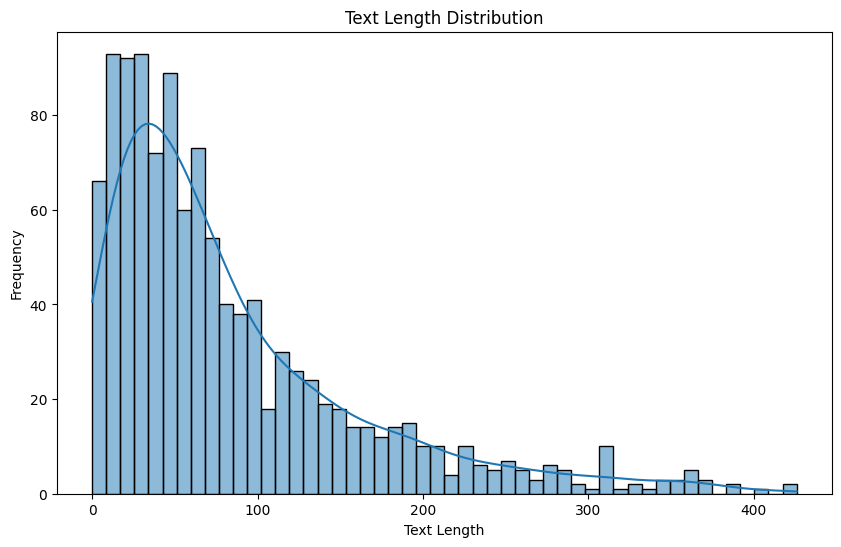

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

data_review_JNT_Cargo['text_length'] = data_review_JNT_Cargo['contentp_clean'].apply(len)

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(data=data_review_JNT_Cargo, x='text_length', bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

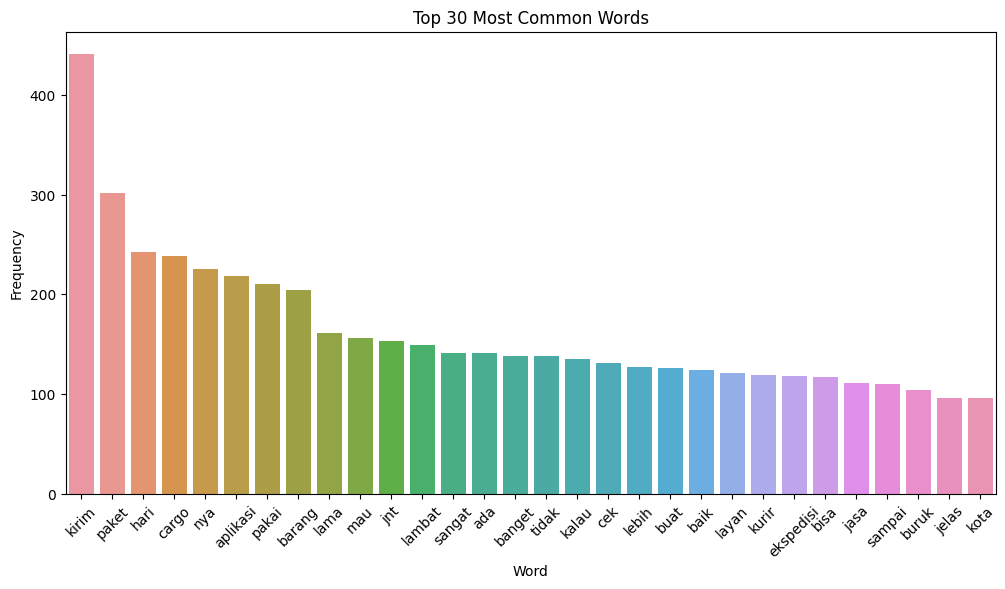

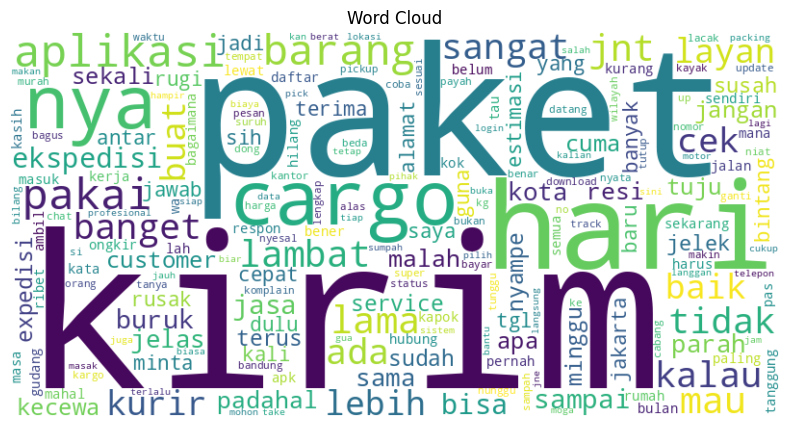

In [10]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize and count word occurrences
word_counts = Counter(word_tokenize(' '.join(data_review_JNT_Cargo['contentp_clean'])))
most_common_words = word_counts.most_common(30)  # Get the top 30 most common words

# Plot a bar chart for the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title('Top 30 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [11]:
# Save file CSV yang sudah di filter
data_review_JNT_Cargo.to_csv('JNT_Cargo_clean.csv', index=False)

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv('JNT_Cargo_clean.csv')
df

,at,userName,content,score,contentp,contentp_clean,text_length
0,2023-12-22 13:18:22,Ghefira Nurfatimah,Pengiriman lama. Layanan dri mulai pick up sam...,1,pengiriman lama layanan dri mulai pick up samp...,kirim lama layan mulai pick up kirim profesional,48
1,2023-12-22 11:50:57,Ahmad Syaifullah,"Motor gw mana bangsaaat ,udah sebulan lebih ga...",1,motor gw mana bangsaaat udah sebulan lebih gak...,motor mana bangsaaat bulan lebih datang datang,46
2,2023-12-22 08:33:56,Dael Harriss,"Paket saya gagal terus gak di kirim² , para ku...",1,paket saya gagal terus gak di kirim² para kuri...,paket gagal terus kirim kurir bagaimana sih la...,66
3,2023-12-21 16:18:14,Sepransiska W.,EKSPEDISI TUKANG MALING! KIRIM KOPER BGR-JKT M...,1,ekspedisi tukang maling kirim koper bgr jkt ma...,ekspedisi tukang maling kirim koper bgr jkt ma...,372
4,2023-12-20 21:57:08,Tri Raharjo,Apaan nih barang utk dikirim tdk bergerak tert...,1,apaan nih barang utk dikirim tdk bergerak tert...,apa nih barang kirim gerak tanggal desember be...,235
...,...,...,...,...,...,...,...
1117,2022-02-24 08:10:06,Rendy Apriyanto,Solo ga bisa cek ongkir,1,solo ga bisa cek ongkir,solo bisa cek ongkir,20
1118,2022-02-24 03:21:06,SANDY KOI,Baru download dan baru nyoba mudah2an bagus,3,baru download dan baru nyoba mudah an bagus,baru download baru coba mudah an bagus,38
1119,2022-02-22 23:02:08,Tika Fathur,"Ngaco, gak bisa kirim ke makassar",4,ngaco gak bisa kirim ke makassar,ngaco bisa kirim makassar,25
1120,2022-02-22 17:13:45,Mirzan Saputra,DP nya belum lengkap,5,dp nya belum lengkap,dp nya lengkap,14


In [13]:
df['sentiment_first_scheme'] = df['score'].apply(lambda x: 'negative' if x in [1, 2] else 'positive')

# Sentiment analysis based on the second scheme
df['sentiment_second_scheme'] = df['score'].apply(lambda x: 'negative' if x in [1, 2] else ('neutral' if x == 3 else 'positive'))


In [14]:
df.sentiment_second_scheme.value_counts()

negative    1033
positive      74
neutral       15
Name: sentiment_second_scheme, dtype: int64

In [15]:
df.sentiment_first_scheme.value_counts()

negative    1033
positive      89
Name: sentiment_first_scheme, dtype: int64

In [16]:
df

,at,userName,content,score,contentp,contentp_clean,text_length,sentiment_first_scheme,sentiment_second_scheme
0,2023-12-22 13:18:22,Ghefira Nurfatimah,Pengiriman lama. Layanan dri mulai pick up sam...,1,pengiriman lama layanan dri mulai pick up samp...,kirim lama layan mulai pick up kirim profesional,48,negative,negative
1,2023-12-22 11:50:57,Ahmad Syaifullah,"Motor gw mana bangsaaat ,udah sebulan lebih ga...",1,motor gw mana bangsaaat udah sebulan lebih gak...,motor mana bangsaaat bulan lebih datang datang,46,negative,negative
2,2023-12-22 08:33:56,Dael Harriss,"Paket saya gagal terus gak di kirim² , para ku...",1,paket saya gagal terus gak di kirim² para kuri...,paket gagal terus kirim kurir bagaimana sih la...,66,negative,negative
3,2023-12-21 16:18:14,Sepransiska W.,EKSPEDISI TUKANG MALING! KIRIM KOPER BGR-JKT M...,1,ekspedisi tukang maling kirim koper bgr jkt ma...,ekspedisi tukang maling kirim koper bgr jkt ma...,372,negative,negative
4,2023-12-20 21:57:08,Tri Raharjo,Apaan nih barang utk dikirim tdk bergerak tert...,1,apaan nih barang utk dikirim tdk bergerak tert...,apa nih barang kirim gerak tanggal desember be...,235,negative,negative
...,...,...,...,...,...,...,...,...,...
1117,2022-02-24 08:10:06,Rendy Apriyanto,Solo ga bisa cek ongkir,1,solo ga bisa cek ongkir,solo bisa cek ongkir,20,negative,negative
1118,2022-02-24 03:21:06,SANDY KOI,Baru download dan baru nyoba mudah2an bagus,3,baru download dan baru nyoba mudah an bagus,baru download baru coba mudah an bagus,38,positive,neutral
1119,2022-02-22 23:02:08,Tika Fathur,"Ngaco, gak bisa kirim ke makassar",4,ngaco gak bisa kirim ke makassar,ngaco bisa kirim makassar,25,positive,positive
1120,2022-02-22 17:13:45,Mirzan Saputra,DP nya belum lengkap,5,dp nya belum lengkap,dp nya lengkap,14,positive,positive


In [17]:
# Memfilter baris dengan label 'Positive'
data_positif = data_review_JNT_Cargo[df['sentiment_second_scheme'] == 'positive']

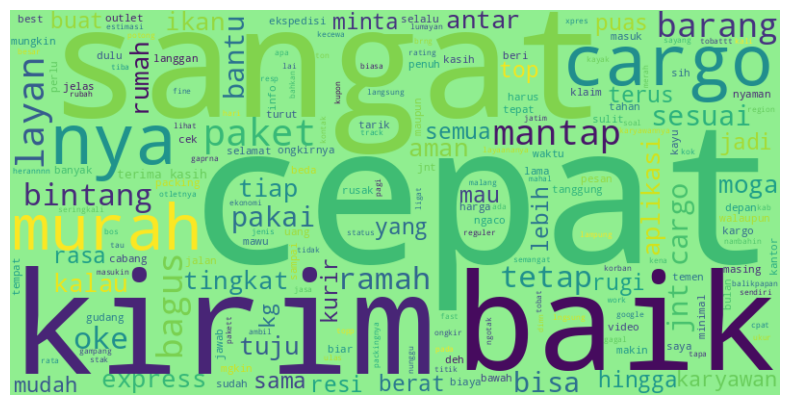

In [18]:
text_corpus = ' '.join(data_positif['contentp_clean'].values)
wordcloud = WordCloud(width=800, height=400, background_color='lightgreen').generate(text_corpus)


# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
# Memfilter baris dengan label 'Neutral'
data_netral = data_review_JNT_Cargo[df['sentiment_second_scheme'] == 'neutral']

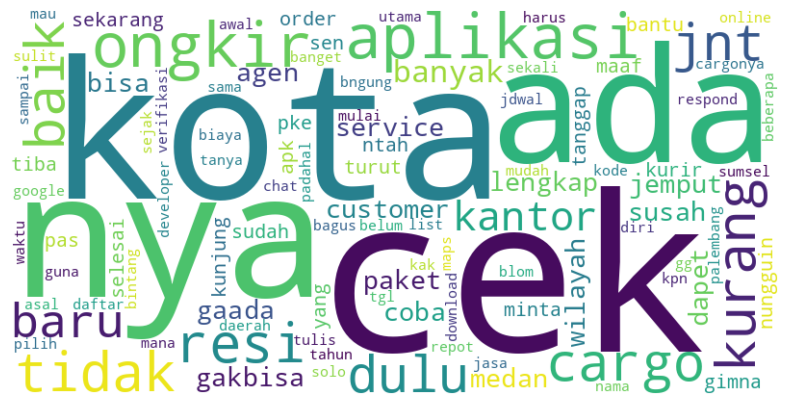

In [20]:
text_corpus = ' '.join(data_netral['contentp_clean'].values)
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
# Memfilter baris dengan label 'Negative'
data_negatif = data_review_JNT_Cargo[df['sentiment_second_scheme'] == 'negative']

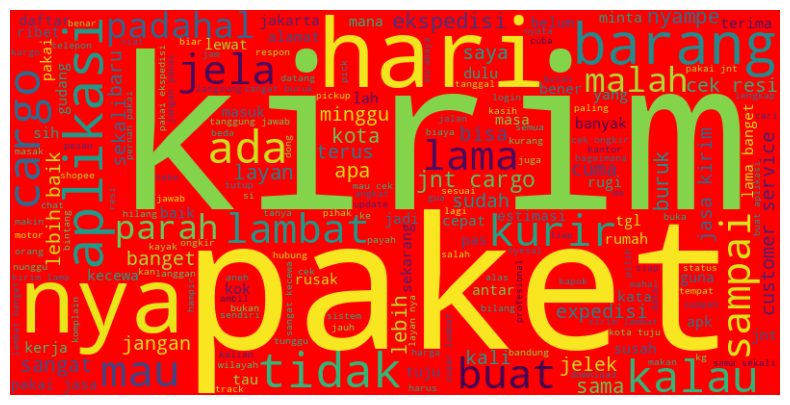

In [22]:
text_corpus = ' '.join(data_negatif['contentp_clean'].values)
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(text_corpus)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Axes: xlabel='score', ylabel='Count'>

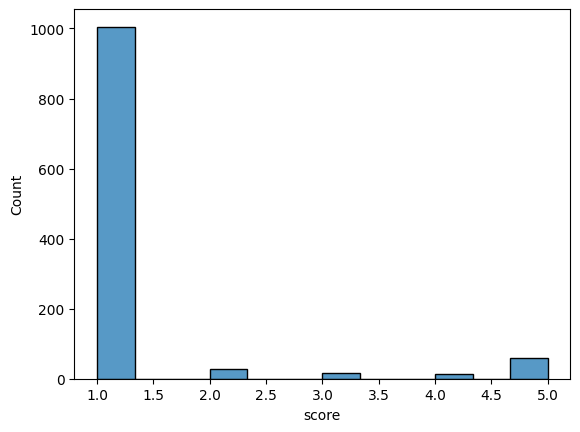

In [23]:
sns.histplot(x='score',data=df)

##Proses Klasifikasi


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [25]:
df = df[['contentp_clean', 'sentiment_first_scheme', 'score']]
missing_values = df['contentp_clean'].isna().sum()
if missing_values > 0:
    df['contentp_clean'].fillna('', inplace=True)

<ipython-input-25-3de0c25f5858>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contentp_clean'].fillna('', inplace=True)


In [26]:
X = df['contentp_clean']  # Text data
y_binary = (df['sentiment_first_scheme'] == 'positive').astype(int)  # Binary labels (1 for positive, 0 for negative)
y_multi = df['score']  # Multi-class labels (original star ratings)

X_train, X_test, y_binary_train, y_binary_test, y_multi_train, y_multi_test = train_test_split(
    X, y_binary, y_multi, test_size=0.2, random_state=42)

In [27]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [28]:
X_train_tfidf

<897x2040 sparse matrix of type '<class 'numpy.float64'>'
	with 10840 stored elements in Compressed Sparse Row format>

In [29]:

X_train_tfidf_dense = X_train_tfidf.toarray()

# Print the TF-IDF representation
print("TF-IDF representation of X_train:")
print(X_train_tfidf_dense)

TF-IDF representation of X_train:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
binary_classifier = LogisticRegression()
binary_classifier.fit(X_train_tfidf, y_binary_train)
binary_predictions = binary_classifier.predict(X_test_tfidf)

In [31]:
print("Binary Classification Report:")
print(classification_report(y_binary_test, binary_predictions))

Binary Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       202
           1       1.00      0.13      0.23        23

    accuracy                           0.91       225
   macro avg       0.95      0.57      0.59       225
weighted avg       0.92      0.91      0.88       225



In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [33]:
# Binary Classification with Random Forest and GridSearchCV
rf_classifier = RandomForestClassifier()
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train_tfidf, y_binary_train)
best_rf_model = grid_search_rf.best_estimator_
binary_predictions_rf = best_rf_model.predict(X_test_tfidf)

# Binary Classification with XGBoost and GridSearchCV
xgb_classifier = XGBClassifier()
param_grid_xgb = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(X_train_tfidf, y_binary_train)
best_xgb_model = grid_search_xgb.best_estimator_
binary_predictions_xgb = best_xgb_model.predict(X_test_tfidf)

# Evaluate binary classification model (Random Forest)
print("Binary Classification Report (Random Forest):")
print(classification_report(y_binary_test, binary_predictions_rf))

# Evaluate binary classification model (XGBoost)
print("Binary Classification Report (XGBoost):")
print(classification_report(y_binary_test, binary_predictions_xgb))

Binary Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       202
           1       1.00      0.26      0.41        23

    accuracy                           0.92       225
   macro avg       0.96      0.63      0.69       225
weighted avg       0.93      0.92      0.90       225

Binary Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       202
           1       1.00      0.35      0.52        23

    accuracy                           0.93       225
   macro avg       0.97      0.67      0.74       225
weighted avg       0.94      0.93      0.92       225



In [34]:
def predict_sentiment(text):
    # Preprocess the input text (e.g., remove punctuation, lowercase, etc.)
    preprocessed_text = text.lower()  # You can add more pre-processing steps as needed

    # Vectorize the preprocessed text using the TF-IDF vectorizer
    text_vectorized = tfidf_vectorizer.transform([preprocessed_text])

    # Predict sentiment using all three models
    rf_prediction = best_rf_model.predict(text_vectorized)
    xgb_prediction = best_xgb_model.predict(text_vectorized)
    logistic_prediction = binary_classifier.predict(text_vectorized)

    return {
        "Random Forest Prediction": "positive" if rf_prediction[0] == 1 else "negative",
        "XGBoost Prediction": "positive" if xgb_prediction[0] == 1 else "negative",
        "Logistic Regression Prediction": "positive" if logistic_prediction[0] == 1 else "negative",
    }

# Example usage:
input_text = "pengiriman lama, kurir tidak ramah"
sentiment_prediction = predict_sentiment(input_text)
print(sentiment_prediction)

{'Random Forest Prediction': 'negative', 'XGBoost Prediction': 'negative', 'Logistic Regression Prediction': 'negative'}


In [35]:
# Example usage:
input_text = "super cepat, kurir ramah"
sentiment_prediction = predict_sentiment(input_text)
print(sentiment_prediction)

{'Random Forest Prediction': 'positive', 'XGBoost Prediction': 'negative', 'Logistic Regression Prediction': 'negative'}


## Multiclass

In [36]:
df

,contentp_clean,sentiment_first_scheme,score
0,kirim lama layan mulai pick up kirim profesional,negative,1
1,motor mana bangsaaat bulan lebih datang datang,negative,1
2,paket gagal terus kirim kurir bagaimana sih la...,negative,1
3,ekspedisi tukang maling kirim koper bgr jkt ma...,negative,1
4,apa nih barang kirim gerak tanggal desember be...,negative,1
...,...,...,...
1117,solo bisa cek ongkir,negative,1
1118,baru download baru coba mudah an bagus,positive,3
1119,ngaco bisa kirim makassar,positive,4
1120,dp nya lengkap,positive,5


In [37]:
df['sentiment_second_scheme'] = df['score'].apply(lambda x: 'negative' if x in [1, 2] else ('neutral' if x == 3 else 'positive'))

<ipython-input-37-9ba4794e3763>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_second_scheme'] = df['score'].apply(lambda x: 'negative' if x in [1, 2] else ('neutral' if x == 3 else 'positive'))


In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment_second_scheme'])

<ipython-input-38-fcca8226eb18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment_second_scheme'])


In [39]:
X = df['contentp_clean']  # Text data
y_multi = df['sentiment_encoded']  # Multi-class labels ("positive," "negative," "neutral")

X_train, X_test, y_multi_train, y_multi_test = train_test_split(
    X, y_multi, test_size=0.2, random_state=42
)

In [40]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Multi-class Classification with Logistic Regression
logistic_classifier = LogisticRegression(max_iter=1000)
logistic_classifier.fit(X_train_tfidf, y_multi_train)

# Predict multi-class sentiment using Logistic Regression
multi_predictions_logistic = logistic_classifier.predict(X_test_tfidf)

# Evaluate multi-class classification model (Logistic Regression)
print("Multi-class Classification Report (Logistic Regression):")
print(classification_report(y_multi_test, multi_predictions_logistic))

Multi-class Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       202
           1       0.00      0.00      0.00         2
           2       1.00      0.29      0.44        21

    accuracy                           0.92       225
   macro avg       0.64      0.43      0.47       225
weighted avg       0.92      0.92      0.90       225



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# Multi-class Classification with Random Forest and GridSearchCV
rf_classifier = RandomForestClassifier()
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train_tfidf, y_multi_train)
best_rf_model = grid_search_rf.best_estimator_

# Multi-class Classification with XGBoost and GridSearchCV
xgb_classifier = XGBClassifier()
param_grid_xgb = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(X_train_tfidf, y_multi_train)
best_xgb_model = grid_search_xgb.best_estimator_


In [42]:
# Evaluate binary classification model (Random Forest)
multi_predictions_rf = best_rf_model.predict(X_test_tfidf)
multi_predictions_xgb = best_xgb_model.predict(X_test_tfidf)

print("Multi Classification Report (Random Forest):")
print(classification_report(y_multi_test, multi_predictions_rf))

# Evaluate binary classification model (XGBoost)
print("Multi Classification Report (XGBoost):")
print(classification_report(y_multi_test, multi_predictions_xgb))

Multi Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       202
           1       0.00      0.00      0.00         2
           2       1.00      0.29      0.44        21

    accuracy                           0.92       225
   macro avg       0.64      0.43      0.47       225
weighted avg       0.92      0.92      0.90       225

Multi Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       202
           1       0.00      0.00      0.00         2
           2       1.00      0.38      0.55        21

    accuracy                           0.93       225
   macro avg       0.64      0.46      0.50       225
weighted avg       0.93      0.93      0.91       225



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
def predict_sentiment_multiclass(text):
    # Preprocess the input text (e.g., remove punctuation, lowercase, etc.)
    preprocessed_text = text.lower()  # You can add more pre-processing steps as needed

    # Vectorize the preprocessed text using the TF-IDF vectorizer
    text_vectorized = tfidf_vectorizer.transform([preprocessed_text])

    # Predict sentiment using all three models
    rf_prediction = best_rf_model.predict(text_vectorized)[0]
    xgb_prediction = best_xgb_model.predict(text_vectorized)[0]
    logistic_prediction = logistic_classifier.predict(text_vectorized)[0]

    # Map numeric labels to sentiment labels
    sentiment_labels = {0: "negative", 1: "neutral", 2: "positive"}

    return {
        "Random Forest Prediction": sentiment_labels[rf_prediction],
        "XGBoost Prediction": sentiment_labels[xgb_prediction],
        "Logistic Regression Prediction": sentiment_labels[logistic_prediction],
    }

# Example usage:
input_text = "biasa saja"
sentiment_prediction = predict_sentiment_multiclass(input_text)
print(sentiment_prediction)

{'Random Forest Prediction': 'negative', 'XGBoost Prediction': 'negative', 'Logistic Regression Prediction': 'negative'}


In [44]:
predicted_sentiments_xgb = label_encoder.inverse_transform(multi_predictions_xgb)

# Create a DataFrame to store the test data and predictions
results_df = pd.DataFrame({'Text': X_test, 'True Sentiment': label_encoder.inverse_transform(y_multi_test),
                            'XGBoost Prediction': predicted_sentiments_xgb})

In [45]:
results_df[results_df['XGBoost Prediction'] == 'neutral']

,Text,True Sentiment,XGBoost Prediction
756,bad banget apk nya masa nama kota medan ada,negative,neutral
